# Part II - (Ford GoBike System Data)

## by (Andrew Kibiwott)

## Investigation Overview
>In this investigation, we take a look  Age, user type and gender of biker users that could be essential to predict the duration of trip for bikes
## Dataset Overview
>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
>The Features included in the Data are as follows :
- Member Year of Birth - Member Gender - User Type (Subscriber or Customer) - Trip Duration(in seconds) - Bike ID - Start Time and Date - End Time and Date - Start Station ID - End Station ID - Start Station Name - End Station Name - End Station Latitude - End Station Longitude- Start Station Latitude- Start Station Longitude.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# data wrangling, removing rows with inconsistent or missing data and unnecessary columns
#We have a lot of empty rows that I do recommend to drop them
df = df.dropna()
# list of column with no value to drop
to_drop = ['start_station_latitude', 
           'start_station_longitude', 
           'end_station_latitude',
           'end_station_longitude', 
           'start_station_id', 
           'bike_id', 
           'end_station_id']
#We should also drop the columns that have no value to our exploratory and explanatory plotting
df.drop(to_drop, inplace=True, axis=1)

#convert the start_time and end_time from object to datetime
df["start_time"] = pd.to_datetime(df["start_time"])
df["end_time"] = pd.to_datetime(df["end_time"])

df["duration_min"] = df["duration_sec"]/60
df.drop('duration_sec', inplace=True, axis=1)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

>Trip duration in the dataset take on a very large range of values, to about 250000 seconds at the highest.Therefore we apply a change to convert "duration_sec" to "duration_min" before we make any logarithmic transformation.
>>Plotted on a logarithmic scale, the distribution of trip duration takes on a normal distribution.


## Distribution of Trip duration

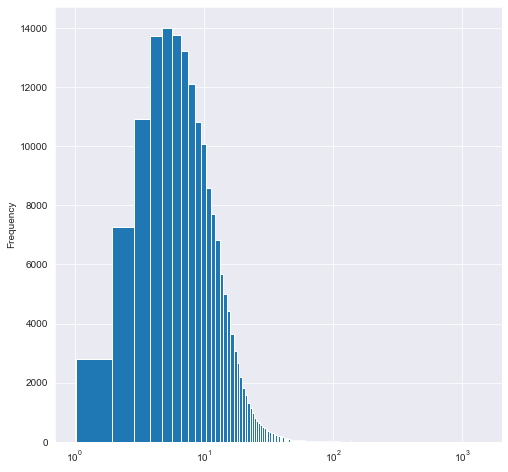

In [4]:
#histogram showing duration of a trip in minutes
plt.figure(figsize =(8,8))
sb.set_style('darkgrid')
df.duration_min.plot.hist(bins=1500)
plt.xscale('log')
plt.show()

## (Visualization 2)

## Trip duration vs Age

>scatter graph of trip duration vs Age
>>produces an inverse correlation where the trip duration increases with Age.

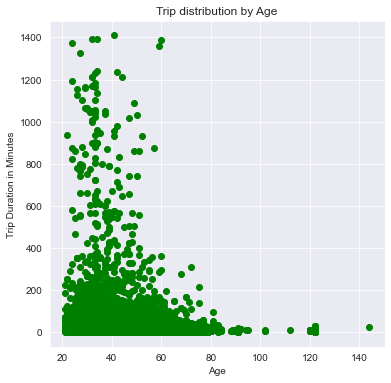

In [5]:
# showing comparisons between quatitative and categorical variables(duration of trip and age)
# define the variable 'age'
df['Age'] = datetime.now().year -df.member_birth_year


plt.figure(figsize = [6,6]) 
# Makes the figure enlarged for better visualization 
plt.scatter(data = df , x = 'Age' , y = 'duration_min', color = 'g' )
plt.title('Trip distribution by Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration in Minutes');

## (Visualization 3)

>>plotting boxplot trip duration shows that the count of Customers is much more than the Subscribers.
Hence, i would say that the user-type does have an impact on trip duration.
>>>it also shows that most bikers prefer not to be subscribers

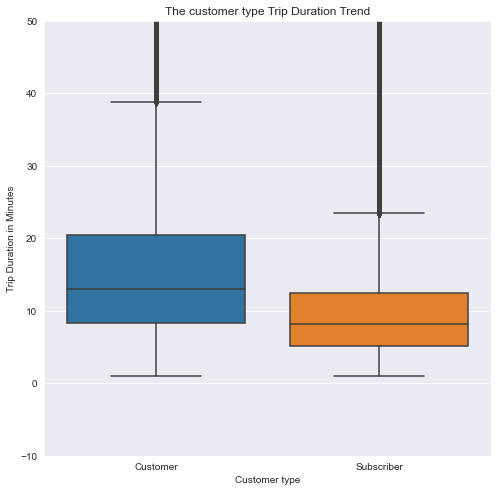

In [6]:
#A box plot showing comparisons between quatitative and categorical variables

plt.figure(figsize = [8,8]) 
sb.boxplot(data = df , x = 'user_type' , y = 'duration_min')
plt.ylim(-10, 50)
plt.title('The customer type Trip Duration Trend')
plt.xlabel('Customer type')
plt.ylabel('Trip Duration in Minutes');

## #(Visualization 4)

## Trip duration vs gender

>Plotting boxplots between trip duration and gender, 
it is key to note that  female and other gender had the highest trip duration than the  male 
while the "other gender leads the chart

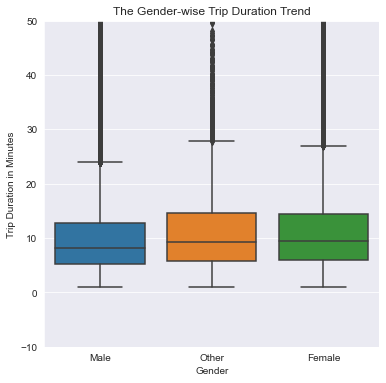

In [7]:
#A box plot showing comparisons between quatitative and categorical variables
plt.figure(figsize = [6,6])  
sb.boxplot(data = df , x = 'member_gender' , y = 'duration_min')
plt.ylim(-10, 50)
plt.title('The Gender-wise Trip Duration Trend')
plt.xlabel('Gender')
plt.ylabel('Trip Duration in Minutes');

In [ ]:
!jupyter nbconvert PartII_go_bike_findings_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

In [ ]:
!jupyter nbconvert "PartII_go_bike_findings_slide_deck" --to slides --post serve --template output_toggle
